In [14]:
import pandas as pd
from scmodels import SCM

scm = SCM(
    [
        # exogenous nodes
        "A1 = N, N ~ LogLogistic(alpha=5, beta=2)",
        "A2 = N, N ~ LogLogistic(alpha=2, beta=2)",
        "A3 = N, N ~ Normal(mean=0, std=1)",
        "A4 = N, N ~ LogNormal(mean=1, std=0.5)",
        
        # first layer of dependency nodes
        "B1 = A1 + A2 + N,  N ~ LogNormal(mean=1, std=1)",
        "B2 = A1*A2 + A3*N, N ~ LogNormal(mean=1, std=1)",
        "B3 = A3 + A4*N,    N ~ Benini(alpha=0.1, beta=0.4, sigma=0.4)",
        "B4 = A3**2 - sqrt(A1 + A4*N), N ~ Normal(mean=2, std=1)",
        
        # second layer of dependency nodes
        "C1 = A1*A3*0.5 + B1*N, N ~ Beta(alpha=0.5, beta=0.5)",
        "C2 = A1*A2     + B2*N, N ~ Beta(alpha=0.5, beta=0.5)",
        "C3 = A1*B3     + B3*N, N ~ Beta(alpha=0.5, beta=0.5)",
        "C4 = B1**2     + B4*N, N ~ Beta(alpha=0.5, beta=0.5)",
        
        # last layer of dependency nodes
        "D1 = A1 + A2 + C1*0.5*N, N ~ Normal(mean=2, std=1)",
        "D2 = B1 + B2 + C1*0.5*N, N ~ Normal(mean=0, std=1)",
        "D3 = C1 + C2 + C3*N,     N ~ Normal(mean=0, std=1)",
        "D4 = (A1 + B1 + C1) * N, N ~ Normal(mean=1, std=1)",
                
        # "Z = N, N ~ LogLogistic(alpha=1, beta=1)",
        # "X = N * 3 * Z ** 2, N ~ LogNormal(mean=1, std=1)",
        # "Y = N + 2 * Z + sqrt(X), N ~ Normal(mean=2, std=1)",
        # "W = K * Y + X, K ~ Benini(alpha=0.1, beta=0.4, sigma=0.4)",
        # "A = Y + N, N ~ DiscreteUniform('N', symbols('a b c'))"
        #"A = A, DiscreteUniform('A', symbols('a b c'))"
    ]
)
print(scm)

Structural Causal Model of 16 variables: A1, A2, A3, A4, B1, B2, B3, B4, C1, C2, ...
Variables with active interventions: []
Assignments:
A1 := f(N) = N	 [ N ~ LogLogistic(alpha=5, beta=2) ]
A2 := f(N) = N	 [ N ~ LogLogistic(alpha=2, beta=2) ]
A3 := f(N) = N	 [ N ~ Normal(mean=0, std=1) ]
A4 := f(N) = N	 [ N ~ LogNormal(mean=1, std=0.500000000000000) ]
B1 := f(N, A1, A2) = A1 + A2 + N	 [ N ~ LogNormal(mean=1, std=1) ]
B2 := f(N, A1, A2, A3) = A1*A2 + A3*N	 [ N ~ LogNormal(mean=1, std=1) ]
B3 := f(N, A3, A4) = A3 + A4*N	 [ N ~ Benini(alpha=0.100000000000000, beta=0.400000000000000, sigma=0.400000000000000) ]
B4 := f(N, A3, A1, A4) = A3**2 - sqrt(A1 + A4*N)	 [ N ~ Normal(mean=2, std=1) ]
C1 := f(N, A1, A3, B1) = A1*A3*0.5 + B1*N	 [ N ~ Beta(alpha=0.500000000000000, beta=0.500000000000000) ]
C2 := f(N, A1, A2, B2) = A1*A2     + B2*N	 [ N ~ Beta(alpha=0.500000000000000, beta=0.500000000000000) ]
C3 := f(N, A1, B3) = A1*B3     + B3*N	 [ N ~ Beta(alpha=0.500000000000000, beta=0.5000000000000

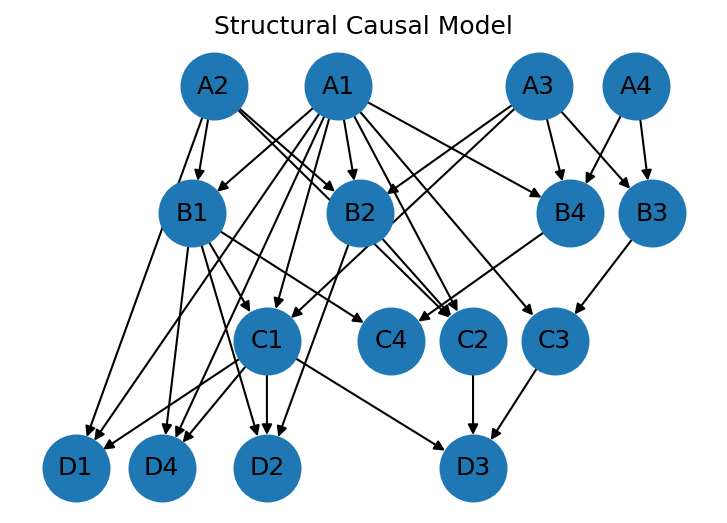

In [11]:
scm.plot(node_size=1000, alpha=1);

In [3]:
scm.sample(10)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(10)]

or add a dimension to size, like

sample(..., size=(10,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float


,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,D1,D2,D4,D3
0,5.213124,1.582170,-0.600346,1.881834,7.842078,4.516001,2.543471,-3.015162,5.903065,8.286052,13.278136,58.485526,11.067397,11.535139,29.651593,28.437135
1,7.808075,1.975368,-1.611290,3.569242,10.941742,14.120104,21.160596,-2.110132,-4.036830,19.292656,174.516046,118.674607,2.815477,26.485272,41.805927,-245.609087
2,8.127063,2.224120,0.294504,2.528697,17.321075,20.495999,18.435000,-2.879465,2.540870,36.705383,165.225633,297.775774,12.802651,37.487770,74.826349,290.535028
3,1.391705,0.941107,1.073704,2.711834,5.163855,36.322902,5.900540,-2.227787,3.800843,36.115584,12.079319,24.483032,7.988642,41.297984,4.557628,20.607030
4,4.696935,1.354090,-0.003807,3.900691,20.707372,6.352663,13.277534,-2.468038,0.015306,6.452787,62.424743,426.424279,6.065180,27.042657,34.024444,-53.097482
5,4.203958,4.700464,-0.828223,2.362064,29.126457,18.282315,0.476646,-2.242566,7.885147,21.625383,2.019435,846.161205,20.128316,40.231295,63.565892,29.676587
6,7.422580,0.874290,-0.437071,3.055054,13.736794,6.320489,14.114500,-2.981961,3.849857,6.658674,109.101802,186.841895,11.282373,21.062353,41.748569,-185.378190
7,16.023888,2.017367,-0.213117,2.074934,26.683766,32.160211,2.651748,-3.926802,1.896884,34.031049,45.110518,709.371941,19.494838,59.191167,9.931302,43.732435
8,0.180033,2.850467,-1.251266,6.738715,4.577262,-12.704203,3.362767,-0.193807,-0.101644,0.489733,1.599527,20.774693,2.890309,-8.108796,3.438209,0.735078
9,4.292445,1.217115,-0.203616,1.764409,7.912796,4.809313,2.527227,-2.817141,4.987889,6.136873,12.407237,62.423268,9.924896,12.036320,1.009151,28.757087


In [4]:
simple_scm = SCM(
        [
        # last layer of dependency nodes
        "A1 = N, N ~ Normal(mean=2, std=1)",
        "A2 = N, N ~ Normal(mean=0, std=1)",
            
         "B1 = A1 + A2 + N, N ~ Normal(mean=0, std=1)",
         "B2 = A1 * A2 * N, N ~ Normal(mean=0, std=1)",
            
         "C1 = B1 + B2 + N, N ~ Normal(mean=0, std=1)",
         "C2 = B1 + B2",
            
         "D1 = N, N ~ Bernoulli(p=0.8)",
    ]
)
print(simple_scm)

Structural Causal Model of 7 variables: A1, A2, D1, B1, B2, C1, C2
Variables with active interventions: []
Assignments:
A1 := f(N) = N	 [ N ~ Normal(mean=2, std=1) ]
A2 := f(N) = N	 [ N ~ Normal(mean=0, std=1) ]
B1 := f(N, A1, A2) = A1 + A2 + N	 [ N ~ Normal(mean=0, std=1) ]
B2 := f(N, A1, A2) = A1 * A2 * N	 [ N ~ Normal(mean=0, std=1) ]
C1 := f(N, B1, B2) = B1 + B2 + N	 [ N ~ Normal(mean=0, std=1) ]
C2 := f(B1, B2) = B1 + B2
D1 := f(N) = N	 [ N ~ Bernoulli(p=0.800000000000000, succ=1, fail=0) ]


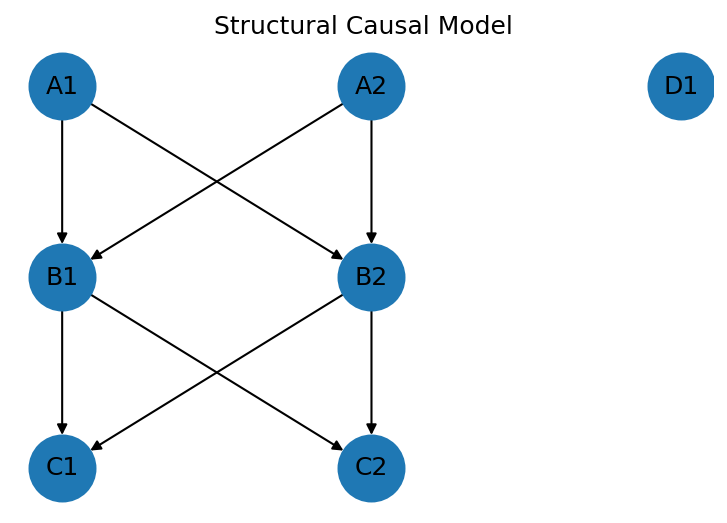

In [12]:
simple_scm.plot(node_size=1000, alpha=1);

In [6]:
simple_scm.sample(10)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(10)]

or add a dimension to size, like

sample(..., size=(10,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float


,A1,A2,D1,B1,B2,C1,C2
0,-0.259916,-0.902348,1.0,-1.932516,0.029468,0.542933,-1.903048
1,1.311090,0.361886,1.0,2.680608,0.072337,4.016387,2.752945
2,2.068238,0.630774,1.0,2.781848,0.442098,2.275620,3.223945
3,2.128704,0.592258,1.0,2.526804,-0.169044,2.628633,2.357760
4,0.759913,-0.230196,1.0,1.589062,0.197371,3.576012,1.786433
5,2.630818,1.222511,0.0,5.150695,-1.776980,2.584071,3.373716
6,-0.046254,2.677043,1.0,-0.483338,0.065481,2.138009,-0.417856
7,3.912446,-0.691719,1.0,3.294237,-0.073395,3.736541,3.220842
8,1.020646,-0.765917,1.0,0.887188,-0.456418,0.770772,0.430770
9,2.841290,0.336128,1.0,2.511146,-1.608773,1.028417,0.902373


## Generate the large dataset

In [7]:
n = 50000
d = simple_scm.sample(n).round(2)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(50000)]

or add a dimension to size, like

sample(..., size=(50000,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float


In [8]:
d.describe().round(2)

,A1,A2,D1,B1,B2,C1,C2
count,50000.00,50000.00,50000.0,50000.00,50000.00,50000.00,50000.00
mean,2.01,-0.00,0.8,2.00,-0.01,1.99,1.99
std,1.00,0.99,0.4,1.72,2.24,3.00,2.82
min,-2.18,-4.49,0.0,-6.71,-29.76,-26.25,-26.10
25%,1.34,-0.68,1.0,0.84,-0.62,0.27,0.46
50%,2.00,-0.01,1.0,2.00,0.00,1.87,1.87
75%,2.68,0.67,1.0,3.16,0.60,3.55,3.34
max,6.59,4.19,1.0,9.39,37.08,44.43,44.88


In [9]:
d.head(10)

,A1,A2,D1,B1,B2,C1,C2
0,3.11,-1.14,0.0,0.08,-1.61,-2.41,-1.53
1,2.13,0.93,1.0,2.75,-1.63,0.40,1.12
2,1.02,0.23,1.0,2.85,-0.60,2.81,2.25
3,1.86,-0.01,1.0,2.36,0.03,2.36,2.39
4,1.25,0.01,1.0,1.17,0.02,0.79,1.18
5,3.52,-1.77,1.0,1.98,11.70,13.69,13.69
6,1.58,-0.40,1.0,2.03,-0.46,1.30,1.57
7,1.85,0.22,1.0,2.88,0.13,3.07,3.01
8,-0.30,-0.66,1.0,-1.17,-0.04,-0.79,-1.21
9,1.47,0.62,0.0,2.15,0.73,3.86,2.88


In [10]:
d.to_csv('simple_scm.csv')